<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1557536921.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1557536921.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     2.730120e+06
1     3.333932e+06
2     4.743915e+06
3     2.871986e+06
4     3.649480e+06
5     2.988750e+06
6     4.568262e+06
7     4.931064e+06
8     5.028326e+06
9     5.774337e+06
10    3.402789e+06
11    3.881077e+06
12    4.925515e+06
13    3.247982e+06
14    4.217962e+06
15    4.501855e+06
16    4.896393e+06
17    4.172760e+06
18    6.021245e+06
Name: Age_Solid, dtype: float64


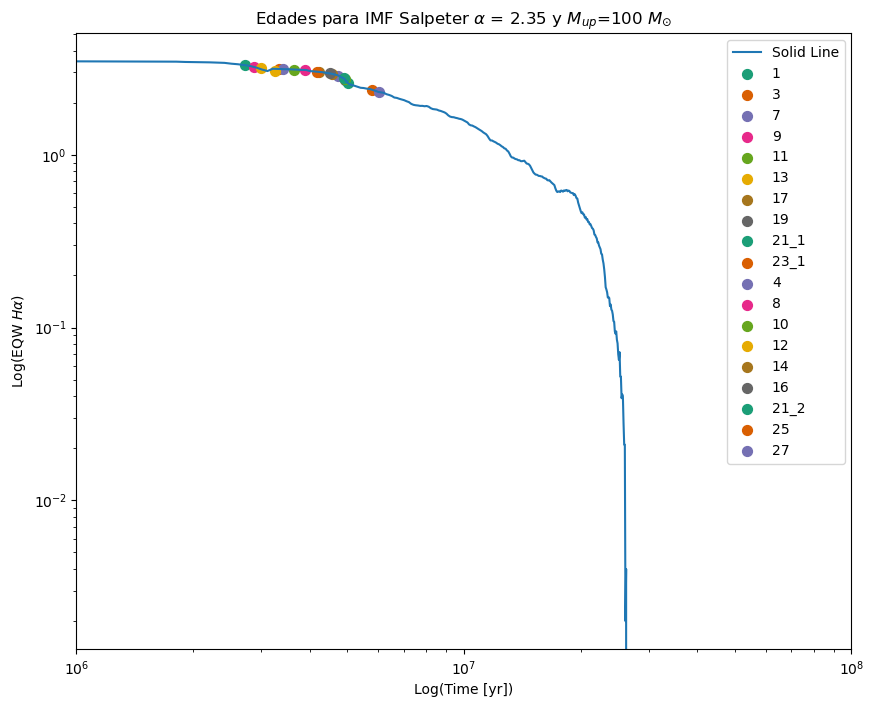

In [1]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


/tmp/ipykernel_6910/1706341352.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     2.730120e+06
1     3.333932e+06
2     4.743915e+06
3     2.871986e+06
4     3.649480e+06
5     2.988750e+06
6     4.568262e+06
7     4.931064e+06
8     5.028326e+06
9     5.774337e+06
10    3.402789e+06
11    3.881077e+06
12    4.925515e+06
13    3.247982e+06
14    4.217962e+06
15    4.501855e+06
16    4.896393e+06
17    4.172760e+06
18    6.021245e+06
Name: Age_Solid, dtype: float64


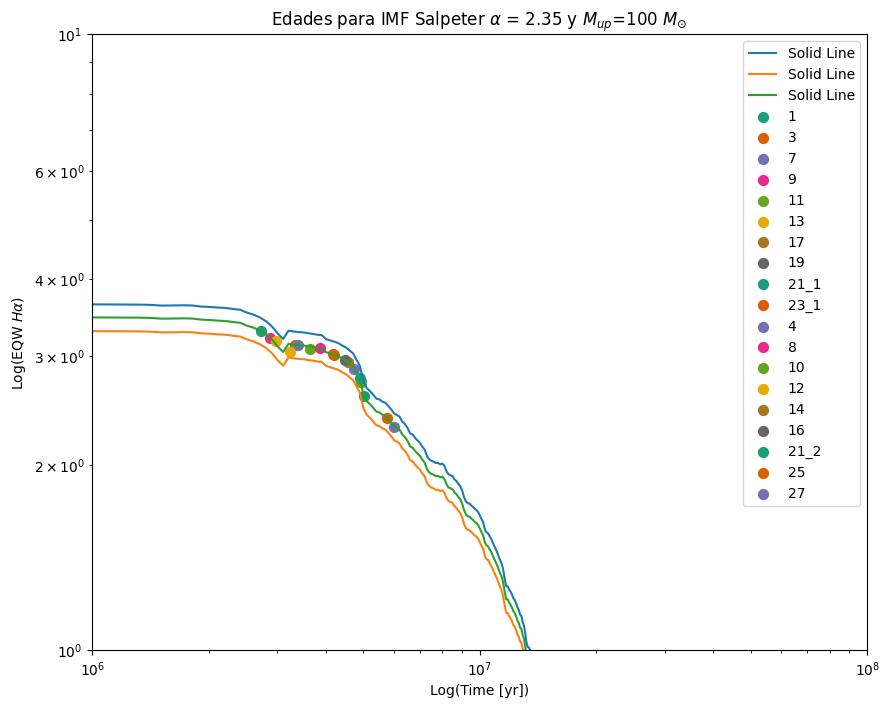

In [10]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
test = starburst_data['Solid']*1.05
test2 = starburst_data['Solid']*0.95

interpolate_solid = interp1d(starburst_data['Solid'], starburst_data['Time'])

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])


eqw_data['Age_Solid'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_Solid'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], test, '-', label='Solid Line')
plt.plot(starburst_data['Time'], test2, '-', label='Solid Line')

plt.plot(starburst_data['Time'], starburst_data['Solid'], '-', label='Solid Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_Solid'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.ylim(1,10)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()


<>:45: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/80568765.py:45: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/80568765.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     7.197250e+06
1     2.480112e+06
2     4.207402e+06
3     3.407444e+06
4     2.797279e+06
5     1.347498e+06
6     3.881132e+06
7     4.812671e+06
8     4.985967e+06
9     5.776635e+06
10    2.493023e+06
11    2.736623e+06
12    4.796034e+06
13    2.910414e+06
14    2.997011e+06
15    3.758382e+06
16    4.733114e+06
17    2.979693e+06
18    6.027162e+06
Name: Age_LongDashed, dtype: float64


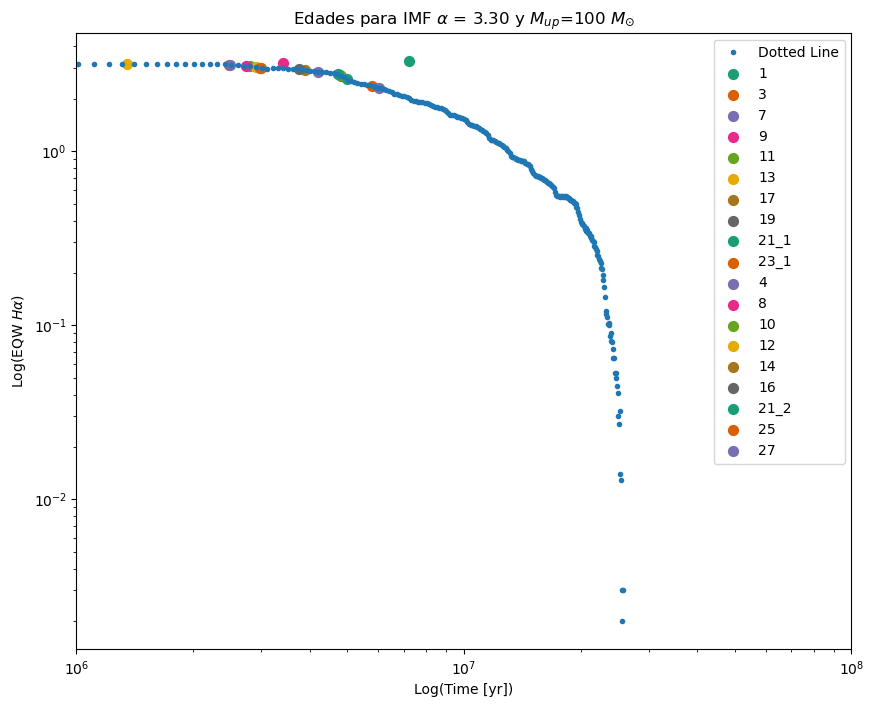

In [5]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['LongDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_LongDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))

print(eqw_data['Age_LongDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['LongDashed'], '.', label='Dotted Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_LongDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF $\\alpha$ = 3.30 y $M_{up}$=100 $M_{\odot}$')
plt.legend()
plt.show()

<>:44: SyntaxWarning: invalid escape sequence '\o'
<>:44: SyntaxWarning: invalid escape sequence '\o'
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1748176460.py:44: SyntaxWarning: invalid escape sequence '\o'
  plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
/var/folders/1d/sms3rjzs38jbhp0zx04sz91c0000gn/T/ipykernel_2125/1748176460.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)


0     4.923350e+07
1     8.792300e+05
2     6.020961e+06
3     2.649467e+07
4     3.629330e+06
5     1.537250e+07
6     5.760755e+06
7     6.416041e+06
8     6.548583e+06
9     6.695912e+06
10    7.018358e+05
11    3.480463e+06
12    6.402776e+06
13    3.958870e+06
14    4.734054e+06
15    5.646551e+06
16    6.347321e+06
17    4.579027e+06
18    6.759645e+06
Name: Age_ShortDashed, dtype: float64


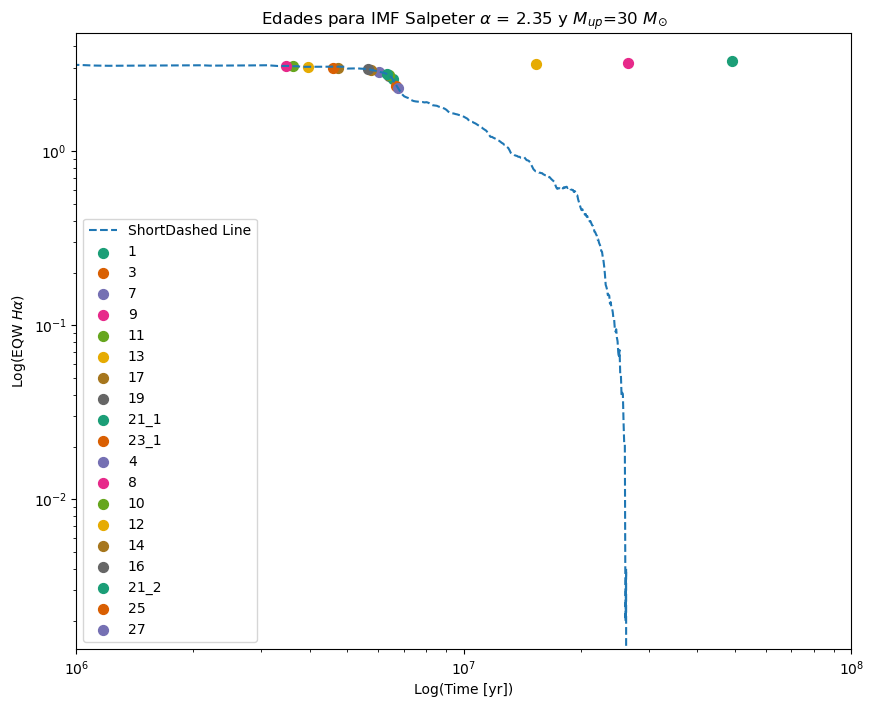

In [3]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 1: Cargar los datos de StarBurst99 sin nombres de columnas
starburst_data = pd.read_csv('sb99a.dat', delim_whitespace=True, header=None)

# Asignar nombres a las columnas
starburst_data.columns = ['Time', 'Solid', 'LongDashed', 'ShortDashed']
interpolate_solid = interp1d(starburst_data['ShortDashed'], starburst_data['Time'], fill_value='extrapolate')

eqw_data = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
eqw_data = eqw_data.drop(index=[19,20,21,22,23])

eqw_data['Age_ShortDashed'] = interpolate_solid(np.log10(eqw_data['H_ALPHA_EQW'].tolist()))
print(eqw_data['Age_ShortDashed'])

# Obtener una paleta de colores con 8 colores diferentes
#palette = sns.color_palette("Dark2", n_colors=8)
#color_map = {id: color for id, color in zip(eqw_data['ID'].unique(), palette)}

# Obtener todos los IDs únicos en eqw_data para asegurar que color_map esté actualizado
unique_ids = eqw_data['ID'].unique()
palette = sns.color_palette("Dark2", n_colors=len(unique_ids))
color_map = {id: color for id, color in zip(unique_ids, palette)}

plt.figure(figsize=(10, 8))

# Graficar los datos de StarBurst99
plt.plot(starburst_data['Time'], starburst_data['ShortDashed'], '--', label='ShortDashed Line')

# Graficar los puntos con diferentes colores según el ID
for id in eqw_data['ID'].unique():
    subset = eqw_data[eqw_data['ID'] == id]
    plt.scatter(subset['Age_ShortDashed'], np.log10(subset['H_ALPHA_EQW']), color=color_map[id], label=f'{id}', s=50)

plt.xscale('log')
plt.yscale('log')
plt.xlim(10**6,10**8)
plt.xlabel('Log(Time [yr])')
plt.ylabel('Log(EQW $H\\alpha$)')
plt.title('Edades para IMF Salpeter $\\alpha$ = 2.35 y $M_{up}$=30 $M_{\odot}$')
plt.legend()
plt.show()

In [6]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

# Parámetros cosmológicos
H0 = 67.8  # Constante de Hubble en km/s/Mpc, de NED
Om0 = 0.308  # Densidad de materia en el universo plano (puedes ajustar según lo necesario)
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Redshift de la galaxia
z = 0.001568

# Calcular la distancia de luminosidad en Mpc
D = cosmo.angular_diameter_distance(z).value  # en Mpc

# Distancia angular en arcsec
# para las regiones SF observadas (de ds9)
theta_arcsec_4 = 219.844
theta_arcsec_8 = 186.082
theta_arcsec_10 = 189.255
theta_arcsec_12 = 164.417
theta_arcsec_14 = 243.849
theta_arcsec_16 = 246.580
theta_arcsec_21_2 = 219.152
theta_arcsec_25 = 193.262
theta_arcsec_27 = 219.101

theta_arcsec_1 = 70.135
theta_arcsec_3 = 77.639
theta_arcsec_5 = 80.253 #79.437 (cuando pongo línea al inicio de la SF region, si la pongo en la max intensidad de Ha entonces 80)
theta_arcsec_7 = 44.245
theta_arcsec_9 = 73.598
theta_arcsec_11 = 82.945
theta_arcsec_13 = 132.034
theta_arcsec_15 = 16.404
theta_arcsec_17 = 152.517
theta_arcsec_19 = 95.697
theta_arcsec_21 = 68.644
theta_arcsec_23 = 53.192

# Convertir arcsec a radianes

theta_rad_4 = theta_arcsec_4 * u.arcsec.to(u.radian)
theta_rad_8 = theta_arcsec_8 * u.arcsec.to(u.radian)
theta_rad_10 = theta_arcsec_10 * u.arcsec.to(u.radian)
theta_rad_12 = theta_arcsec_12 * u.arcsec.to(u.radian)
theta_rad_14 = theta_arcsec_14 * u.arcsec.to(u.radian)
theta_rad_16 = theta_arcsec_16 * u.arcsec.to(u.radian)
theta_rad_21_2 = theta_arcsec_21_2 * u.arcsec.to(u.radian)
theta_rad_25 = theta_arcsec_25 * u.arcsec.to(u.radian)
theta_rad_27 = theta_arcsec_27 * u.arcsec.to(u.radian)

theta_rad_1 = theta_arcsec_1 * u.arcsec.to(u.radian)
theta_rad_3 = theta_arcsec_3 * u.arcsec.to(u.radian)
theta_rad_5 = theta_arcsec_5 * u.arcsec.to(u.radian)
theta_rad_7 = theta_arcsec_7 * u.arcsec.to(u.radian)
theta_rad_9 = theta_arcsec_9 * u.arcsec.to(u.radian)
theta_rad_11 = theta_arcsec_11 * u.arcsec.to(u.radian)
theta_rad_13 = theta_arcsec_13 * u.arcsec.to(u.radian)
theta_rad_15 = theta_arcsec_15 * u.arcsec.to(u.radian)
theta_rad_17 = theta_arcsec_17 * u.arcsec.to(u.radian)
theta_rad_19 = theta_arcsec_19 * u.arcsec.to(u.radian)
theta_rad_21 = theta_arcsec_21 * u.arcsec.to(u.radian)
theta_rad_23 = theta_arcsec_23 * u.arcsec.to(u.radian)

# Calcular la distancia física en kpc
d_kpc_4 = D * theta_rad_4 * 1000
d_kpc_8 = D * theta_rad_8 * 1000
d_kpc_10 = D * theta_rad_10 * 1000
d_kpc_12 = D * theta_rad_12 * 1000
d_kpc_14 = D * theta_rad_14 * 1000
d_kpc_16 = D * theta_rad_16 * 1000
d_kpc_21_2 = D * theta_rad_21_2 * 1000
d_kpc_25 = D * theta_rad_25 * 1000
d_kpc_27 = D * theta_rad_27 * 1000

d_kpc_1 = D * theta_rad_1 * 1000  # Convertir Mpc a kpc
d_kpc_3 = D * theta_rad_3 * 1000
d_kpc_5 = D * theta_rad_5 * 1000
d_kpc_7 = D * theta_rad_7 * 1000
d_kpc_9 = D * theta_rad_9 * 1000
d_kpc_11 = D * theta_rad_11 * 1000
d_kpc_13 = D * theta_rad_13 * 1000
d_kpc_15 = D * theta_rad_15 * 1000
d_kpc_17 = D * theta_rad_17 * 1000
d_kpc_19 = D * theta_rad_19 * 1000
d_kpc_21 = D * theta_rad_21 * 1000
d_kpc_23 = D * theta_rad_23 * 1000

print(f"Distancia física desde slit 4 al centro de NGC1313: {d_kpc_4:.3f} kpc")
print(f"Distancia física desde slit 8 al centro de NGC1313: {d_kpc_8:.3f} kpc")
print(f"Distancia física desde slit 10 al centro de NGC1313: {d_kpc_10:.3f} kpc")
print(f"Distancia física desde slit 12 al centro de NGC1313: {d_kpc_12:.3f} kpc")
print(f"Distancia física desde slit 14 al centro de NGC1313: {d_kpc_14:.3f} kpc")
print(f"Distancia física desde slit 16 al centro de NGC1313: {d_kpc_16:.3f} kpc")
print(f"Distancia física desde slit 21_2 al centro de NGC1313: {d_kpc_21_2:.3f} kpc")
print(f"Distancia física desde slit 25 al centro de NGC1313: {d_kpc_25:.3f} kpc")
print(f"Distancia física desde slit 27 al centro de NGC1313: {d_kpc_27:.3f} kpc")

print(f"Distancia física desde slit 1 al centro de NGC1313: {d_kpc_1:.3f} kpc")
print(f"Distancia física desde slit 3 al centro de NGC1313: {d_kpc_3:.3f} kpc")
print(f"Distancia física desde slit 5 al centro de NGC1313: {d_kpc_5:.3f} kpc")
print(f"Distancia física desde slit 7 al centro de NGC1313: {d_kpc_7:.3f} kpc")
print(f"Distancia física desde slit 9 al centro de NGC1313: {d_kpc_9:.3f} kpc")
print(f"Distancia física desde slit 11 al centro de NGC1313: {d_kpc_11:.3f} kpc")
print(f"Distancia física desde slit 13 al centro de NGC1313: {d_kpc_13:.3f} kpc")
print(f"Distancia física desde slit 15 al centro de NGC1313: {d_kpc_15:.3f} kpc")
print(f"Distancia física desde slit 17 al centro de NGC1313: {d_kpc_17:.3f} kpc")
print(f"Distancia física desde slit 19 al centro de NGC1313: {d_kpc_19:.3f} kpc")
print(f"Distancia física desde slit 21 al centro de NGC1313: {d_kpc_21:.3f} kpc")
print(f"Distancia física desde slit 23 al centro de NGC1313: {d_kpc_23:.3f} kpc")

Distancia física desde slit 4 al centro de NGC1313: 7.375 kpc
Distancia física desde slit 8 al centro de NGC1313: 6.243 kpc
Distancia física desde slit 10 al centro de NGC1313: 6.349 kpc
Distancia física desde slit 12 al centro de NGC1313: 5.516 kpc
Distancia física desde slit 14 al centro de NGC1313: 8.181 kpc
Distancia física desde slit 16 al centro de NGC1313: 8.272 kpc
Distancia física desde slit 21_2 al centro de NGC1313: 7.352 kpc
Distancia física desde slit 25 al centro de NGC1313: 6.484 kpc
Distancia física desde slit 27 al centro de NGC1313: 7.351 kpc
Distancia física desde slit 1 al centro de NGC1313: 2.353 kpc
Distancia física desde slit 3 al centro de NGC1313: 2.605 kpc
Distancia física desde slit 5 al centro de NGC1313: 2.692 kpc
Distancia física desde slit 7 al centro de NGC1313: 1.484 kpc
Distancia física desde slit 9 al centro de NGC1313: 2.469 kpc
Distancia física desde slit 11 al centro de NGC1313: 2.783 kpc
Distancia física desde slit 13 al centro de NGC1313: 4.430 k

new
slit1: 67.959 arcsec
slit3: 75.586 arcsec
slit5: 76.600 arcsec
slit7: 42.141 arcsec
slit9: 



hacerlo cuando tenga tiempo, ahora sólo calcularé los nuevos, sin embargo, lo ideal es calcularlos todos igual

slit 4: 219.844 arcsec
slit 10: 189.255 arsec
slit 12: 164.417 arcsec
slit 21_2: 219.152
slit 25: 193.262

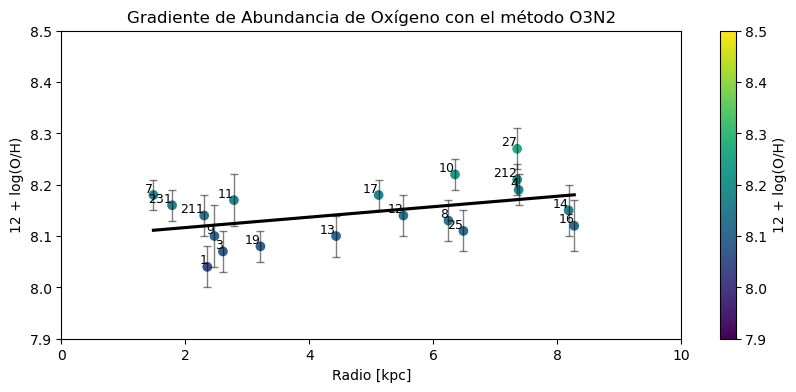

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('gradiente_oficial.tsv', delimiter='\t')
df

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)
#plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='o', color='red', capsize=5, label='N2 Error')


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.5)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

sns.regplot(x='r_kpc', y='12_LOG_OH_O3N2', data=df, scatter=False, ci=None, color='black', line_kws={'label':"y={0:.2f}x+{1:.2f}".format(*np.polyfit(df['r_kpc'], df['12_LOG_OH_O3N2'], 1))})

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2')
plt.xlim(0,10)
plt.ylim(7.9,8.5)
# Mostrar la gráfica
plt.show()



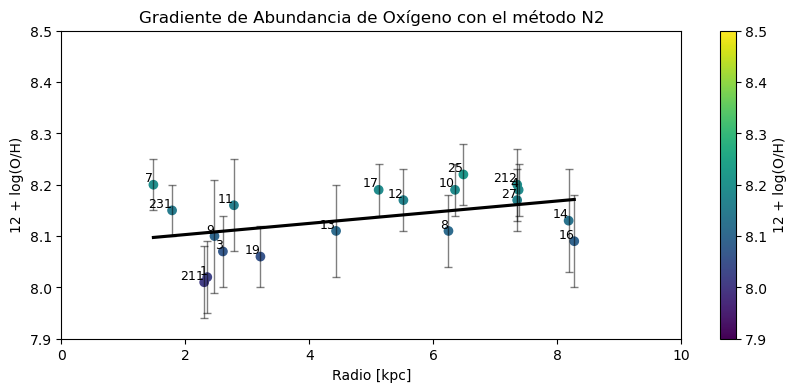

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('gradiente_oficial.tsv', delimiter='\t')

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)
#plt.errorbar(df['r_kpc'], df['12_LOG_OH_N2'], yerr=df['12_LOG_OH_N2_ERR'], fmt='o', color='red', capsize=5, label='N2 Error')


# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_N2'], c=df['12_LOG_OH_N2'], cmap='viridis', vmin=7.9, vmax=8.5)


# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

sns.regplot(x='r_kpc', y='12_LOG_OH_N2', data=df, scatter=False, ci=None, color='black', line_kws={'label':"y={0:.2f}x+{1:.2f}".format(*np.polyfit(df['r_kpc'], df['12_LOG_OH_N2'], 1))})

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método N2')
plt.xlim(0,10)
plt.ylim(7.9,8.5)
# Mostrar la gráfica
plt.show()



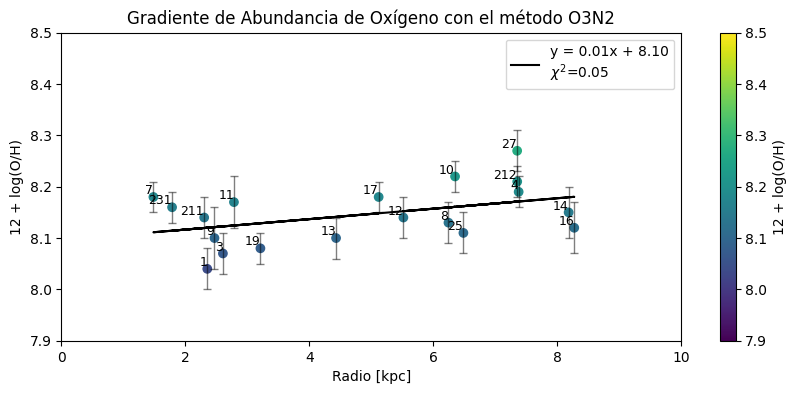

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lmfit import Model

# Cargar los datos
df = pd.read_csv('gradiente_oficial.tsv', delimiter='\t')

# Definir la función lineal
def linear(x, slope, intercept):
    return slope * x + intercept

# Crear el modelo de lmfit y realizar el ajuste
model = Model(linear)
result = model.fit(df['12_LOG_OH_O3N2'], x=df['r_kpc'], slope=1, intercept=1)

# Extraer los parámetros ajustados y el valor de chi cuadrado
slope = result.params['slope'].value
intercept = result.params['intercept'].value
chi_square = result.chisqr

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.5)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

# Graficar la línea de regresión ajustada
plt.plot(df['r_kpc'], result.best_fit, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$={chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2')
plt.xlim(0, 10)
plt.ylim(7.9, 8.5)
plt.legend()

# Mostrar la gráfica
plt.show()

/home/belen/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


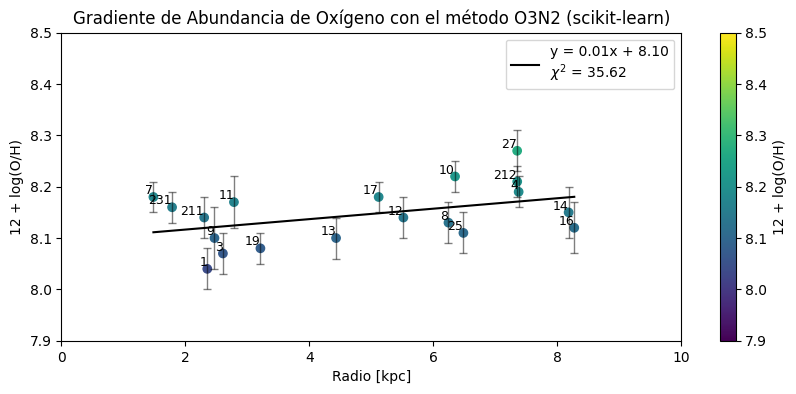

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

# Cargar los datos
df = pd.read_csv('gradiente_oficial.tsv', delimiter='\t')

# Crear el modelo de regresión lineal
model = LinearRegression()
# Ajustar el modelo
model.fit(df[['r_kpc']], df['12_LOG_OH_O3N2'])

# Obtener los parámetros
slope = model.coef_[0]
intercept = model.intercept_

# Calcular los valores ajustados y el chi cuadrado
y_model = model.predict(df[['r_kpc']])
chi_square = np.sum(((df['12_LOG_OH_O3N2'] - y_model) / df['12_LOG_OH_O3N2_ERR']) ** 2)

# Configurar la gráfica
plt.figure(figsize=(10, 4))

# Agregar barras de error
plt.errorbar(df['r_kpc'], df['12_LOG_OH_O3N2'], yerr=df['12_LOG_OH_O3N2_ERR'], fmt='none', ecolor='black', capsize=3, alpha=0.5, elinewidth=1)

# Scatter plot con color bar
sc = plt.scatter(df['r_kpc'], df['12_LOG_OH_O3N2'], c=df['12_LOG_OH_O3N2'], cmap='viridis', vmin=7.9, vmax=8.5)

# Agregar colorbar
cbar = plt.colorbar(sc)
cbar.set_label('12 + log(O/H)')

# Graficar la línea de regresión
x_line = np.linspace(df['r_kpc'].min(), df['r_kpc'].max(), 100)
y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, color='black', label=f"y = {slope:.2f}x + {intercept:.2f}\n$\chi^2$ = {chi_square:.2f}")

# Añadir etiquetas de los puntos con ID
for i, row in df.iterrows():
    plt.text(row['r_kpc'], row['12_LOG_OH_O3N2'], str(int(row['ID'])), fontsize=9, ha='right', va='bottom')

# Etiquetas y título
plt.xlabel('Radio [kpc]')
plt.ylabel('12 + log(O/H)')
plt.title('Gradiente de Abundancia de Oxígeno con el método O3N2 (scikit-learn)')
plt.xlim(0, 10)
plt.ylim(7.9, 8.5)
plt.legend()

# Mostrar la gráfica
plt.show()


In [5]:
import pandas as pd
import numpy as np

# Cargar los datos
df = pd.read_csv('measurement_emission_lines_oficial.tsv', delimiter='\t')
df = df.drop(index=[19,20,21,22,23])

# Aplicar el factor 10^-15 al flujo de H alfa
df['H_ALPHA_FLUX'] *= 1e-15

# La distancia en Mpc
distance_mpc = 4.1

# Constantes
distance_cm = distance_mpc * 3.086e24  # Convertir Mpc a cm
kenn_ratio = 7.9e-42  # Kennicutt 98 ratio en M_sun/yr/(erg/s)

# Calcular la luminosidad L en erg/s
df['L_H_ALPHA'] = df['H_ALPHA_FLUX'] * 4 * np.pi * distance_cm**2

# Calcular la SFR usando Kennicutt 98
df['SFR'] = df['L_H_ALPHA'] * kenn_ratio

# Mostrar el resultado
df['H_ALPHA_FLUX'],df['L_H_ALPHA'],df['SFR']

(0     2.574884e-13
 1     4.616594e-14
 2     3.873912e-14
 3     8.354096e-14
 4     1.426157e-13
 5     8.003813e-14
 6     3.015209e-14
 7     2.125748e-14
 8     3.109344e-14
 9     1.028192e-14
 10    3.201929e-14
 11    1.743460e-14
 12    4.562292e-15
 13    2.809194e-15
 14    1.928537e-14
 15    1.250614e-14
 16    2.780142e-15
 17    1.629613e-15
 18    1.400273e-15
 Name: H_ALPHA_FLUX, dtype: float64,
 0     5.179969e+38
 1     9.287335e+37
 2     7.793261e+37
 3     1.680618e+38
 4     2.869040e+38
 5     1.610150e+38
 6     6.065782e+37
 7     4.276428e+37
 8     6.255156e+37
 9     2.068443e+37
 10    6.441413e+37
 11    3.507368e+37
 12    9.178094e+36
 13    5.651336e+36
 14    3.879693e+37
 15    2.515896e+37
 16    5.592892e+36
 17    3.278339e+36
 18    2.816969e+36
 Name: L_H_ALPHA, dtype: float64,
 0     0.004092
 1     0.000734
 2     0.000616
 3     0.001328
 4     0.002267
 5     0.001272
 6     0.000479
 7     0.000338
 8     0.000494
 9     0.000163
 10    0.

In [7]:
df['L_H_ALPHA'].median()

4.276428350792781e+37

In [8]:
df['SFR']

0     0.004092
1     0.000734
2     0.000616
3     0.001328
4     0.002267
5     0.001272
6     0.000479
7     0.000338
8     0.000494
9     0.000163
10    0.000509
11    0.000277
12    0.000073
13    0.000045
14    0.000306
15    0.000199
16    0.000044
17    0.000026
18    0.000022
Name: SFR, dtype: float64